# Exploratory Analysis

```
"get to know the dataset"
```


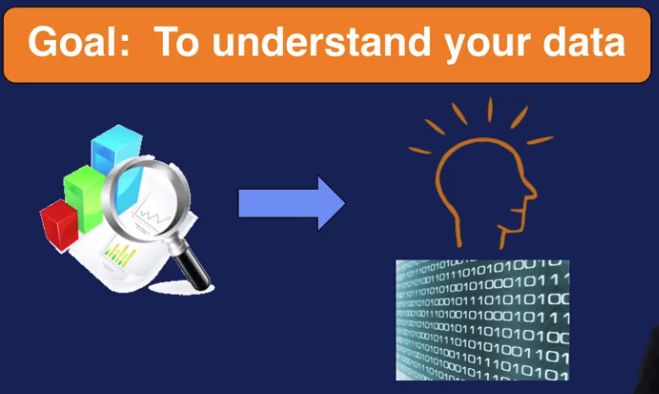

In [7]:
# hide_code
Image('reports/undestand_data.png')

### Basic
First, you'll want to answer a set of basic questions about the dataset:

- How many observations do I have?
- How many features?
- What are the data types of my features? Are they numeric? Categorical?
- Do I have a target variable?

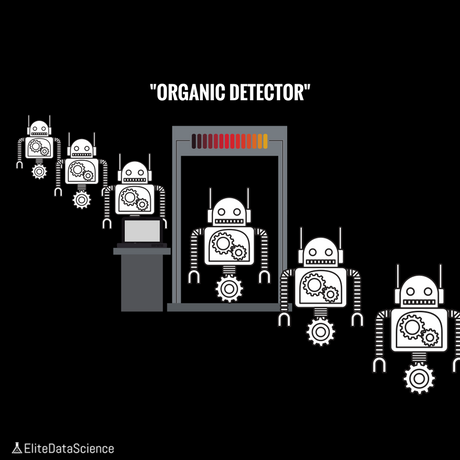

In [8]:
# hide_code
Image('reports/organic.png')

# Ways to explore data

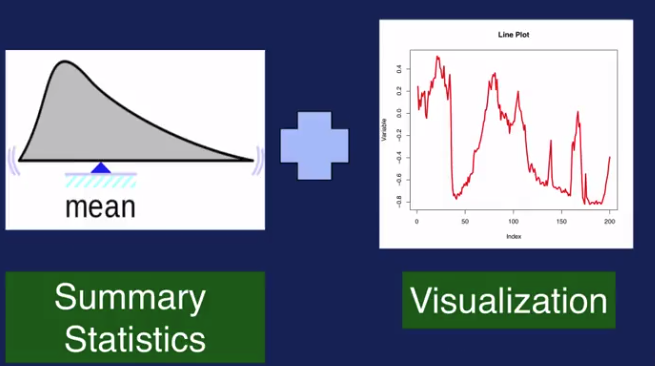

In [9]:
# hide_code
Image('reports/way_to_explore.png')

---

## Imports

In [2]:
# Data analysis and data wrangling
import numpy as np
import pandas as pd

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Preprocessing
from sklearn.preprocessing import LabelEncoder

# Machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

# Dataset
from sklearn.datasets import load_iris

# Other
from IPython.display import Image
import configparser
import subprocess
import warnings
import pprint
import time
import os

---

## Prepare Principal Directory

In [3]:
def prepare_directory_work(end_directory: str='notebooks'):
    # Current path
    curr_dir = os.path.dirname (os.path.realpath ("__file__")) 
    
    if curr_dir.endswith(end_directory):
        os.chdir('..')
        return curr_dir
    
    return f'Current working directory: {curr_dir}'

In [4]:
prepare_directory_work(end_directory='notebooks')

'/home/campos/projetos/artificial_inteligence/data-science/steps_data_science/notebooks'

---

## Cell Format

In [5]:
import configparser

config = configparser.ConfigParser()
config.read('src/visualization/matplotlib_config.ini')

figure_titlesize = config['figure']['figure_titlesize']
figure_figsize_large = int(config['figure']['figure_figsize_large'])
figure_figsize_width = int(config['figure']['figure_figsize_width'])
figure_dpi = int(config['figure']['figure_dpi'])
figure_facecolor = config['figure']['figure_facecolor']
figure_autolayout = bool(config['figure']['figure_autolayout'])
savefig_format = config['figure']['savefig_format']
savefig_dpi = int(config['figure']['savefig_dpi'])

axes_labelsize = int(config['axes']['axes_labelsize'])
axes_titlesize = int(config['axes']['axes_labelsize'])

lines_antialiased = bool(config['line']['lines_antialiased'])
lines_linewidth = int(config['line']['lines_linewidth'])
lines_color = config['line']['lines_color']

hist_bins = int(config['histogram']['hist_bins'])

boxplot_vertical = bool(config['boxplot']['boxplot_vertical'])
boxplot_showmeans = bool(config['boxplot']['boxplot_showmeans'])
boxplot_showbox = bool(config['boxplot']['boxplot_showbox'])
boxplot_flierprops_color = config['boxplot']['boxplot_flierprops_color']
boxplot_flierprops_markerfacecolor = config['boxplot']['boxplot_flierprops_markerfacecolor']
boxplot_flierprops_markersize = int(config['boxplot']['boxplot_flierprops_markersize'])
boxplot_meanprops_linewidth = int(config['boxplot']['boxplot_meanprops_linewidth'])

font_family = config['font']['font_family']
font_size = int(config['font']['font_size'])

legend_loc = config['legend']['legend_loc']
legend_fontsize = int(config['legend']['legend_fontsize'])

In [6]:
# matplotlib rcParams
# ===================
# Customizing file matplotlibrc
#
# Dynamic rc settings
# -------------------
import matplotlib.pyplot as plt

plt.style.use('seaborn')  # fivethirtyeight

# Figure
plt.rcParams['figure.titlesize'] = figure_titlesize
plt.rcParams['figure.figsize'] = [figure_figsize_large, figure_figsize_width] 
plt.rcParams['figure.dpi'] = figure_dpi
plt.rcParams['figure.facecolor'] = figure_facecolor
plt.rcParams['figure.autolayout'] = figure_autolayout

plt.rcParams['savefig.format'] = savefig_format
plt.rcParams['savefig.dpi'] = savefig_dpi

# Axes
plt.rcParams['axes.labelsize'] = axes_labelsize
plt.rcParams['axes.titlesize'] = axes_titlesize

# Lines
plt.rcParams['lines.antialiased'] = lines_antialiased
plt.rcParams['lines.linewidth'] = lines_linewidth
plt.rcParams['lines.color'] = lines_color
 
# Histogram Plots
plt.rcParams['hist.bins'] = hist_bins

# Boxplot
plt.rcParams['boxplot.vertical'] = boxplot_vertical
plt.rcParams['boxplot.showmeans'] = boxplot_showmeans
plt.rcParams['boxplot.showbox'] = boxplot_showbox
plt.rcParams['boxplot.flierprops.color'] = boxplot_flierprops_color
plt.rcParams['boxplot.flierprops.markerfacecolor'] = boxplot_flierprops_markerfacecolor
plt.rcParams['boxplot.flierprops.markersize'] = boxplot_flierprops_markersize
plt.rcParams['boxplot.meanprops.linewidth'] = boxplot_meanprops_linewidth

# Font
plt.rcParams['font.family'] = font_family
plt.rcParams['font.size'] = font_size

# Legend
plt.rcParams['legend.loc'] = legend_loc
plt.rcParams['legend.fontsize'] = legend_fontsize

# Seaborn rcParams
# ===================
sns.set(font=font_family,
        context='poster',  # notebook
        style='darkgrid',
        palette='deep',
        font_scale=1,
        color_codes=True)

In [ ]:
# Seaborn rcParams
# ===================

rc={'savefig.dpi': 500, 
    'figure.autolayout': True, 
    'figure.figsize': [15, 8], 
    'axes.labelsize': 18,
    'axes.titlesize': 18, 
    'font.size': 15, 
    'lines.linewidth': 1.0, 
    'lines.markersize': 8, 
    'legend.fontsize': 15,
    'xtick.labelsize': 15, 
    'ytick.labelsize': 15}

sns.set(font=font_family,
        context='poster',  # notebook
        style='darkgrid',
        palette='deep',
        color_codes=True)

# graph style
sns.set(style='dark', palette='deep')

In [7]:
# Guarantees visualization inside the jupyter
%matplotlib inline

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# Format the data os all table (float_format 3)
pd.set_option('display.float_format', '{:.6}'.format)

# Print xxxx rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

# Pretty print
pp = pprint.PrettyPrinter(indent=4)

---

## Load Data

In [18]:
%%time

df = pd.read_csv('data/titanic_data.csv', 
                  encoding='utf8',
                  delimiter=',', 
                  verbose=True)

Tokenization took: 0.38 ms
Type conversion took: 1.55 ms
Parser memory cleanup took: 0.00 ms
CPU times: user 7.77 ms, sys: 0 ns, total: 7.77 ms
Wall time: 6.87 ms


In [19]:
%%time

df_callcenter = pd.read_csv('data/callcenter_marketing.csv', 
                            encoding='utf8',
                            delimiter=',',
                            verbose=True)

Tokenization took: 35.53 ms
Type conversion took: 42.59 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 6.59 ms
Type conversion took: 8.60 ms
Parser memory cleanup took: 0.00 ms
CPU times: user 102 ms, sys: 11.3 ms, total: 113 ms
Wall time: 111 ms


---

## Global Variables

In [44]:
# Lists that will be manipulated in the data processing
list_columns = []
list_categorical_col = []
list_numerical_col = []

In [43]:
def get_col(df: 'dataframe', type_descr: 'numpy') -> list:
    """
    Function get list columns 
    
    Args:
    type_descr
        np.number, np.object -> return list with all columns
        np.number            -> return list numerical columns 
        np.object            -> return list object columns
    """
    try:
        col = (df.describe(include=type_descr).columns)  # pandas.core.indexes.base.Index  
    except ValueError:
        print(f'Dataframe not contains {type_descr} columns !', end='\n')    
    else:
        return col.tolist() 

In [42]:
def get_col_without_target(df: 'dataframe',
                           list_columns: list,
                           target_col: str) -> list:

    col_target = list_columns.copy()
    
    col_target.remove(target_col)
    print(type(col_target))
    
    
    return col_target

## Summary Statistics

As várias _measures_ server para analisar o comportamento de uma variável.

- Medidas de tendencia central
- Medidas de dispersão
- Medidas de forma (shape)
- Medidas de dependência

### Measures Central Trend 

- Mean: 
    - Necessay to get **standard deviation and variance**
    - More precise when distribuition follow Skewness
    
  - Meadian: 
    - Know center
    - More precise when distribuition not Skewness
    
  - Mode: 
    - Know trend
    
  - Skewness
    - Simetric distribution

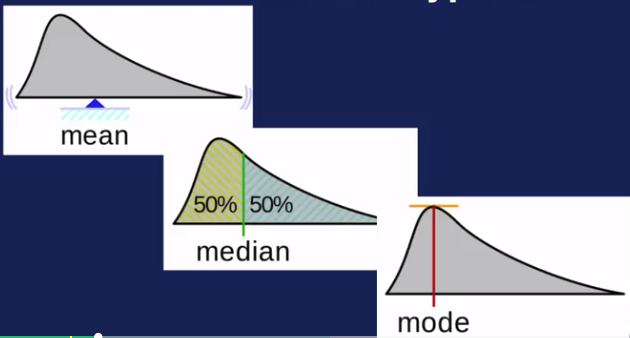

In [24]:
# hide_code
from IPython.display import Image 
Image('reports/mean_mode_median.png')

In [45]:
list_numerical_col = get_col(df=df_callcenter,
                             type_descr=np.number)
list_categorical_col = get_col(df=df_callcenter,
                               type_descr=np.object)
list_columns = get_col(df=df_callcenter,
                       type_descr=[np.object, np.number])
list_without_target_col = get_col_without_target(df=df_callcenter,
                                                 list_columns=list_columns,
                                                 target_col='resultado')

<class 'list'>


In [14]:
display(list_numerical_col)

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [15]:
display(list_categorical_col)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [16]:
display(list_columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

---

## Understand Data

### Metadata

In [17]:
!cat data/callcenter_descricao.txt

O dataset fornece o resultado de uma campanha de marketing para cada usuário (sim - comprou / nao - não comprou)

Temos como variáveis:

Dados do cliente:
   1 - idade
   2 - profissao
   3 - estado_civil
   4 - educacao
   5 - inadimplente
   6 - emprestimo_moradia: possui empréstimo para moradia?
   7 - emprestimo_pessoal: possui empréstimo pessoal?
Dados relacionados com últimos contatos:
   8 - meio_contato: tipo de contato
   9 - mes: último mês de contato
  10 - dia_da_semana: último dia da semana de contato
  11 - duracao: última duração do contato, em segundos. Nota: este atributo causa overfitting no modelo.
Outras variáveis:
  12 - qtd_contatos_campanha: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13 - dias_ultimo_contato: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14 - qtd_contatos_total: number of contacts pe

### View Firsts Lines

In [21]:
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [22]:
display(df_callcenter.head(10))

,Unnamed: 0,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
0,0,56,dona_casa,casado,fundamental_4a,nao,nao,nao,telefone,mai,seg,261,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
1,1,57,servicos,casado,ensino_medio,NaN,nao,nao,telefone,mai,seg,149,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
2,2,37,servicos,casado,ensino_medio,nao,sim,nao,telefone,mai,seg,226,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
3,3,40,admin.,casado,fundamental_6a,nao,nao,nao,telefone,mai,seg,151,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
4,4,56,servicos,casado,ensino_medio,nao,nao,sim,telefone,mai,seg,307,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
5,5,45,servicos,casado,fundamental_9a,NaN,nao,nao,telefone,mai,seg,198,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
6,6,59,admin.,casado,curso_tecnico,nao,nao,nao,telefone,mai,seg,139,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
7,7,41,colarinho_azul,casado,NaN,NaN,nao,nao,telefone,mai,seg,217,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
8,8,24,tecnico,solteiro,curso_tecnico,nao,sim,nao,telefone,mai,seg,380,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
9,9,25,servicos,solteiro,ensino_medio,nao,sim,nao,telefone,mai,seg,50,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao


### Shape 

In [26]:
print("Dataframe:\n\t{} rows\n\t{} columns"
      .format(df.shape[0],  # rows
              df.shape[1]))  # columns

Dataframe:
	891 rows
	12 columns


### Information About Column
- column's name
- row by column
- type by column
- type dataframe
- size dataframe

In [27]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


None

In [28]:
list_columns = (df_callcenter.columns).tolist()

print("-"*25, "List Columns", "-"*25, end='\n')
display(list_columns)

------------------------- List Columns -------------------------


['Unnamed: 0',
 'idade',
 'profissao',
 'estado_civil',
 'educacao',
 'inadimplente',
 'emprestimo_moradia',
 'emprestimo_pessoal',
 'meio_contato',
 'mes',
 'dia_da_semana',
 'duracao',
 'qtd_contatos_campanha',
 'dias_ultimo_contato',
 'qtd_contatos_total',
 'campanha_anterior',
 'indice_precos_consumidor',
 'indice_confianca_consumidor',
 'euribor3m',
 'numero_empregados',
 'resultado']

### Type by Column

In [15]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


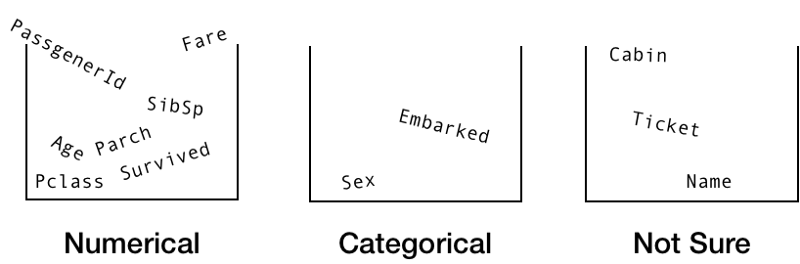

In [16]:
# hide_code
from IPython.display import Image 
Image('reports/bucket_titanic.png')

In [17]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [18]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [46]:
import statistics

In [36]:
def show_measures_location(df: 'dataframe', type_descr: 'list') -> 'dataframe':
    """
    Function get measures localization + total col + % type 
    Handler when type data not exists
    
    Args:
    type_descr
        np.number, np.object  -> return summary statistic with all columns
        np.number             -> return summary statistic numerical columns 
        np.object             -> return summary statistic object columns
    """
    try:
        col = (df.describe(include=type_descr).columns)  # pandas.core.indexes.base.Index  
    except ValueError:
        print(f'Dataframe not contains {type_descr} columns !', end='\n\n')    
    else:
        list_col = col.tolist()
        percentage = (len(list_col) / df.shape[1]) * 100
        
        print("-"*25, "MEASURES OF LOCALIZATION", "-"*25, end='\n\n')
        print(f"TOTAL columns {type_descr}: {len(list_col)}")
        print("PERCENTAGE {} in dataframe: {:3.4} %".format(type_descr, percentage))
        
        return df.describe(include=type_descr)

In [37]:
show_measures_location(df=df,
                       type_descr=[np.number, np.object])

------------------------- MEASURES OF LOCALIZATION -------------------------

TOTAL columns [<class 'numpy.number'>, <class 'object'>]: 12
PERCENTAGE [<class 'numpy.number'>, <class 'object'>] in dataframe: 100.0 %


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.0,891.0,891.0,891,891,714.0,891.0,891.0,891,891.0,204,889
unique,nan,nan,nan,891,2,nan,nan,nan,681,nan,147,3
top,nan,nan,nan,"Lesurer, Mr. Gustave J",male,nan,nan,nan,CA. 2343,nan,G6,S
freq,nan,nan,nan,1,577,nan,nan,nan,7,nan,4,644
mean,446.0,0.383838,2.30864,NaN,NaN,29.6991,0.523008,0.381594,NaN,32.2042,NaN,NaN
std,257.354,0.486592,0.836071,NaN,NaN,14.5265,1.10274,0.806057,NaN,49.6934,NaN,NaN
min,1.0,0.0,1.0,NaN,NaN,0.42,0.0,0.0,NaN,0.0,NaN,NaN
25%,223.5,0.0,2.0,NaN,NaN,20.125,0.0,0.0,NaN,7.9104,NaN,NaN
50%,446.0,0.0,3.0,NaN,NaN,28.0,0.0,0.0,NaN,14.4542,NaN,NaN
75%,668.5,1.0,3.0,NaN,NaN,38.0,1.0,0.0,NaN,31.0,NaN,NaN


In [38]:
show_measures_location(df=df,
                       type_descr=[np.number])

------------------------- MEASURES OF LOCALIZATION -------------------------

TOTAL columns [<class 'numpy.number'>]: 7
PERCENTAGE [<class 'numpy.number'>] in dataframe: 58.33 %


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0,891.0,891.0,714.0,891.0,891.0,891.0
mean,446.0,0.383838,2.30864,29.6991,0.523008,0.381594,32.2042
std,257.354,0.486592,0.836071,14.5265,1.10274,0.806057,49.6934
min,1.0,0.0,1.0,0.42,0.0,0.0,0.0
25%,223.5,0.0,2.0,20.125,0.0,0.0,7.9104
50%,446.0,0.0,3.0,28.0,0.0,0.0,14.4542
75%,668.5,1.0,3.0,38.0,1.0,0.0,31.0
max,891.0,1.0,3.0,80.0,8.0,6.0,512.329


In [41]:
show_measures_location(df=df,
                       type_descr=[np.object])

------------------------- MEASURES OF LOCALIZATION -------------------------

TOTAL columns [<class 'object'>]: 5
PERCENTAGE [<class 'object'>] in dataframe: 41.67 %


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Lesurer, Mr. Gustave J",male,CA. 2343,G6,S
freq,1,577,7,4,644


### Measure of Shape
Medidas de forma descrevem a forma da distribuição de um conjunto de valores. 
- Skew
- kurtosis

#### Skewness
"Assimetria dos dados."

Quanto mais próximo estiver de 0, melhor (normal distribuition). A assimetria basicamente significa que os dados de saída estão concentrados em uma extremidade do intervalo. Nós gostamos que nossos dados sejam o mais central possível.

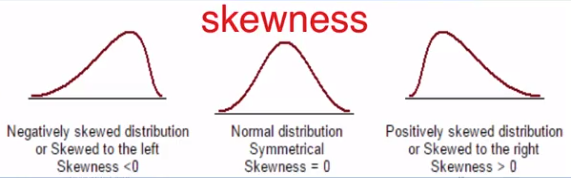

In [26]:
# hide_code
from IPython.display import Image 
Image('reports/skews.png')

In [27]:
df.skew()

PassengerId    0.00
Survived       0.48
Pclass        -0.63
Age            0.39
SibSp          3.70
Parch          2.75
Fare           4.79
dtype: float64

#### Kurtosis

kurtosis to measure how heavy its tails are compared to a normal distribution,

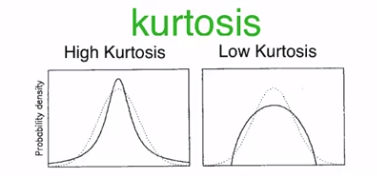

In [28]:
# hide_code
from IPython.display import Image 
Image('reports/kurtosis.png')

In [29]:
from scipy.stats import kurtosis
from scipy.stats import skew


data = np.random.normal(0, 1, 10000000)
np.var(data)


print("Measure of Shape\n")
print("skew = ",skew(data))
print("kurt = ",kurtosis(data))

Measure of Shape

skew =  -0.0008084727188267447
kurt =  0.00018034838623570693


In [47]:
#  At this point I decided to use dataframe to maintain the same function pattern df.describe()
# However, dictionnaires are more recommended because they are faster in a few data.

def show_measures_shape(df: 'dataframe', *columns: 'list') -> 'dataframe':
    index = ['skew', 'kurtosis'] 
    df_temp = pd.DataFrame(index=[index])
        
    print("-"*25, "MEASURES OF SHAPE", "-"*25, end='\n')
    
    for column in columns:
        list_temp = []
                
        list_temp.append(df[column].skew())
        list_temp.append(df[column].kurt())
        
        df_temp[column] = list_temp
    
    return df_temp

In [48]:
show_measures_shape(df_callcenter, *list_numerical_col)

------------------------- MEASURES OF SHAPE -------------------------


,Unnamed: 0,idade,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados
skew,0.0,0.784697,3.26314,4.76251,-4.92219,3.83204,-0.230888,0.30318,-0.709188,-1.04426
kurtosis,-1.2,0.791312,20.2479,36.9798,22.2295,20.1088,-0.829809,-0.358558,-1.4068,-0.00376038


### Measures of spread 

- Standard Deviation
- Variance and Covariance 
  - Quanto, em média, as observações variam do valor médio.
- Maximum
- Minimum
- Range
- maximum - minimum

In [50]:
def show_measures_spread(df: 'dataframe', *columns: 'list') -> 'dataframe':
    index = ['std_deviation_pop',
            'std_deviation',
             'variance_pop',
             'variance',
             'maximum',
             'minimum'] 

    df_temp = pd.DataFrame(index=[index])
    
    print("-"*25, "MEASURES OF SPREAD", "-"*25, end='\n\n')
    
    for column in columns:
        list_temp = []
                
        list_temp.append(statistics.pstdev(df[column])) # population
        list_temp.append(statistics.stdev(df[column])) # sample
        list_temp.append(statistics.pvariance(df[column])) # population
        list_temp.append(statistics.variance(df[column])) # sample
        list_temp.append(df[column].max())
        list_temp.append(df[column].min())
        
        df_temp[column] = list_temp
    
    return df_temp

In [51]:
show_measures_spread(df_callcenter, *list_numerical_col)

------------------------- MEASURES OF SPREAD -------------------------



,Unnamed: 0,idade,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados
std_deviation_pop,11890.0,10.4211,259.276,2.76998,186.909,0.494895,0.578833,4.62814,1.73443,72.2507
std_deviation,11890.1,10.4212,259.279,2.77001,186.911,0.494901,0.57884,4.6282,1.73445,72.2515
variance_pop,1.41371e+08,108.6,67224.1,7.67279,34934.8,0.244921,0.335048,21.4197,3.00823,5220.16
variance,1.41374e+08,108.602,67225.7,7.67298,34935.7,0.244927,0.335056,21.4202,3.00831,5220.28
maximum,41187.0,98.0,4918.0,56.0,999.0,7.0,94.767,-26.9,5.045,5228.1
minimum,0.0,17.0,0.0,1.0,0.0,0.0,92.201,-50.8,0.634,4963.6


#### Covariance

- Mede a relação entre 2 ou mais variáveis

- Como interpretar?<br/>
  - O sinal da covariância pode ser interpretado como se as duas variáveis **mudam na mesma direção (positiva) ou mudam em  direções diferentes (negativas).**
  - A magnitude da covariância não é facilmente interpretada. 
  - Um valor de covariância de zero indica que ambas as variáveis são completamente independentes.

In [31]:
# calculate the covariance between two variables
from numpy.random import randn
from numpy.random import seed
from numpy import cov
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)


# calculate covariance matrix
covariance = cov(data1, data2)
print(covariance)

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


A covariância entre as duas variáveis ​​é de 389,75. Podemos ver que isso é positivo, sugerindo que as variáveis ​​mudam na mesma direção que esperamos.

### Measure of Dependence

"Describe relationship between variables."

- Correlation is a value between -1 and 1
- Correlations near -1 or 1 indicate a strong relationship.
- Um valor abaixo de -0,5 ou acima de 0,5 indica uma correlação notável
- Aqueles mais próximos de 0 indicate a weak relationship.

#### Goal get with anasylis correlations

- Which features are strongly correlated with the **target variable**?
- Are there interesting or unexpected strong correlations between other features?


Types:
- Correlation Pearson
- Correlation Spearman


In [19]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


#### Pearson
Testa se duas amostras têm um **relacionamento linear.**

In [32]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate Pearson's correlation
corr, p = pearsonr(data1, data2)
# display the correlation
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.888


#### Spearman
Testa se duas amostras possuem um **relacionamento monotônico.**

- Suposições
  - As observações em cada amostra são independentes e identicamente distribuídas (iid).
  - As observações em cada amostra podem ser classificadas.

In [33]:
from scipy.stats import spearmanr
corr, p = spearmanr(data1, data2)
print('Spearman correlation: %.3f' % corr)

Spearman correlation: 0.872


## Sample size (amostragem)
- Amostras muito grande é um disperdício de tempo e dinheiro, já pequensa demais são imprecisas.
- O tamanho da amostra é importante em 2 pontos, primeiro para determinar se há uma quantidade mínima para se analisar e segundo, se é possível dividir a amostra em dados de tranning e test.

#### Steps to calculate
- Defina a feature de target
- Denida a escala dos dados:
    - nominal
    - ordinal
    - intervalar
- Calcule a tamanho da população
- Calcule o desvio padrão
- Calcule o erro amostral
- Determine o intervalo de confiança
- Encontre o escore Z


tamanho_amostra = (z * std)/erro

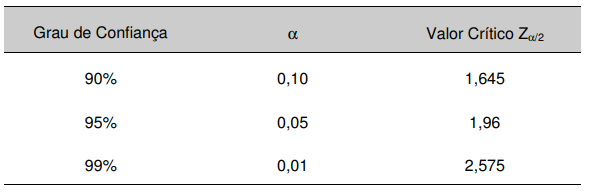

In [37]:
Image('reports/grau_confiança.png')

### Correcao de Bessel

Quando se pega uma amostra de uma populacao a maioria dos valores tendem a ser no meio da populacao, especialmente se a distribuicao for normal.


A correcao de Bessel eh usada para aumentar o desvio padrao e a variancia dos dados

### Statistical Hypothesis Tests

Os dados devem ser interpretados para adicionar significado. Podemos interpretar dados assumindo uma estrutura específica em nosso resultado e usar métodos estatísticos para confirmar ou rejeitar a suposição.

- Hipótese 0 (H0) : A suposição do teste é válida e não foi rejeitada.
- Hipótese 1 (H1) : A suposição do teste não é válida e é rejeitada em algum nível de significância.


Um teste de hipóteses estatísticas amplamente utilizado é o teste t de Student para comparar os valores médios de duas amostras independentes.

O teste funciona verificando os meios de duas amostras para ver se eles são significativamente diferentes uns dos outro

Lembre-se, no entanto, que dados melhores geralmente superam algoritmos melhores, e projetar bons recursos é um grande avanço. E se você tiver um conjunto de dados enorme, qualquer algoritmo de classificação usado pode não importar muito em termos de desempenho de classificação (escolha seu algoritmo com base na velocidade ou facilidade de uso).

No final da exploração **crie as hipóteses e pense no que analisar**.